# Example of Map Generation

Map generated in 0.076017 seconds


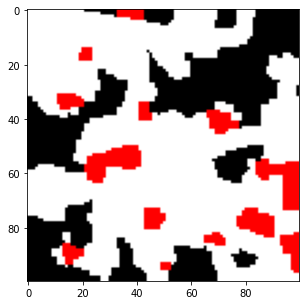

In [5]:
from swarm_mapping.map import Map
import time

t0 = time.time()
m = Map(100, 100, space_fill=0.5, hazard_fill=0.2, fast=False)
tf = time.time()
m.show()
print(f"Map generated in {round(tf - t0, 6)} seconds")

# World Generation

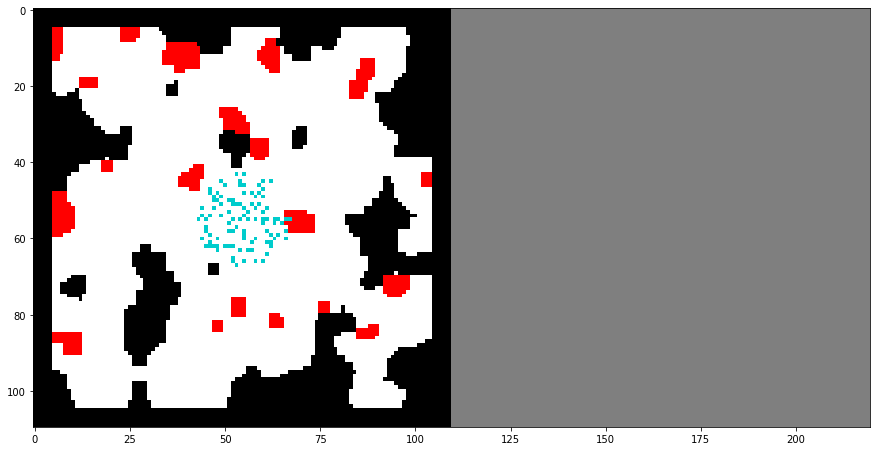

In [6]:
from swarm_mapping.world import World, Agent
from swarm_mapping.map import Map

w = World(100, 100, 100, space_fill=0.6, hazard_fill=0.15,fast=False, sensor_range=1)
w.show(size=(15,15))

In [7]:
import time
import cProfile

# Iterate a step of the sim, and then show state
start = time.time()
#cProfile.run('w.step()')
w.step()
end = time.time()
print(f"{end - start} seconds to run step.")

start = time.time()
w.show(size=(15,15))
end = time.time()
print(f"{end - start} seconds to render and display.")

[0. 0.]


IndexError: index -2147483648 is out of bounds for axis 0 with size 110

In [ ]:
# Example of proximity sensor output
agent = w.agents[0]
agent.proximity()

In [ ]:
# Example of camera output
agent = w.agents[1]
agent.camera()

### Run and Animate Simulation

In [1]:
import cv2
import numpy as np
from swarm_mapping.world import World

w = World(100, 100, 100, space_fill=0.5, hazard_fill=0.2,fast=False, marker_size=3, motion="diffuse")
# Display size
display_width = 1600
display_height = 800

step = 0
while True:
    frame = w.render()
    shared_map = w.render(w.agents_map)
    frame = np.concatenate((frame, shared_map), axis=1)
    frame = cv2.resize(frame, (display_width, display_height), interpolation = cv2.INTER_AREA)
    cv2.imshow('Sim',cv2.cvtColor((frame*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    w.step()
    step += 1
cv2.destroyAllWindows()

C:\Users\Adam\Programming\Python\rbe-swarm-intelligence\swarm_mapping\motion.py:60: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._motion == "diffuse":
C:\Users\Adam\Programming\Python\rbe-swarm-intelligence\swarm_mapping\motion.py:63: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._motion == "rcw":


### Print Agent States

In [ ]:
for agent in w.agents:
    print(agent)